In [256]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [257]:
#reading csv file and storing in df  
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### checking nulls

In [258]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cabin has 687 null data ie about 78% is null data, therefore its better to drop
- Age has 177 null data about 20% is null data, needs to be imputed, need to check correaltion with target also vif to determine if it should be dropped or not
- Embarked  has only 2 missing data which can be easily imputed
- Passenenger_Id is for idenitfying passengers and the last number signifies total number of passengers that have boarded onto the ship, so its better to drop

In [259]:
df.drop('Cabin',axis=1,inplace=True)

- dropping Cabin column

#### checking data types

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


- Name, Sex, Ticket and Embarked are object datatypes and rest are numerical datatypes

#### checking how the data is defined statistically

In [261]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- SibSp can be zero as the traveller must have come alone 
- Parch can also be zero as they may have travled without their parents or children
- Fare cannot be zero need to be imputed, by mean value

#### Imputation

- Fare adding mean value of Fare to all missing data

In [262]:
#finding position where fare has value 0 and impuiting its value by mean
pos=np.where(df['Fare']==0)
for i in pos:
    df.loc[i,'Fare']=df['Fare'].mean()

In [263]:
#check
df['Fare'].isna().sum()

0

- Age filling nulls by the mean according to their sex

In [264]:
#finding the mean of Age grouped by Sex
age_mean=round(df.groupby(["Sex"]).agg({"Age":"mean"}),0)
age_mean

,Age
Sex,
female,28.0
male,31.0


In [265]:
for index in age_mean.index:
    pos=df.loc[df["Sex"]==index,["Age"]].isnull()
    for index_2 in pos.index:
        if pos.loc[index_2][0]==True:
            df.loc[index_2,["Age"]]=age_mean.loc[index][0]

- loop starts by taking female then male for index value
- pos
    - df["Sex"] tries to match with index value
    - next it checks where nulls are present by using the isnull() iin Age column, isnull() return True if nulls are present and False if no nulls are present
- second loop runs using the index values in pos
- here only those who have true value are taken, False condition is not taken
- Age where nulls are present is imputed by mean value at that location 

In [266]:
#check
df['Age'].isna().sum()

0

- Embarked imputed by mode

In [267]:
#pos stores where nulls are present and loop is used to impute the value S as it is the most frequent value
pos=np.where(df['Embarked'].isnull()==True)
for i in pos:
    df.loc[i,'Embarked']='S'

In [268]:
#check
df['Embarked'].isna().sum()

0

#### seperating numerical data and categorical data and plotting

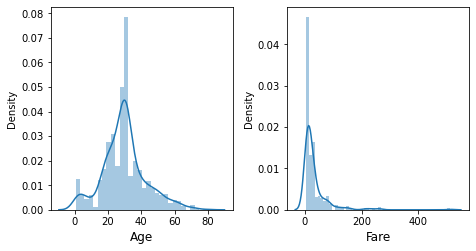

In [269]:
#numericalColumns stores Age and Fare as they are continous numerical data and plot is made
numericalColumns=df[['Age','Fare']].copy()
j=0
plt.figure(figsize=(10,10))
for column in numericalColumns:
    plt.subplot(3,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- Age
    - appears uniformly ditributed with very less skewness, presence of outliers can be observed
    - most of the passengers were faround the age of 30s, value very close to zero indicates that infant were also onboard the ship and travelers as old as 80 were onboard the ship

- Fare
    - the averge fare value is around 30 the value close to zero indicates that there were kids onboard and also some may have availed discounts, fare value ranges from 0-200 also a large variation in fare prices could be due to differnce in the price in class they have taken the seat
    - the graph appears to be uniformly ditributed with positive skewness and presence of outliers

#### Numerical Categorical Columns

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


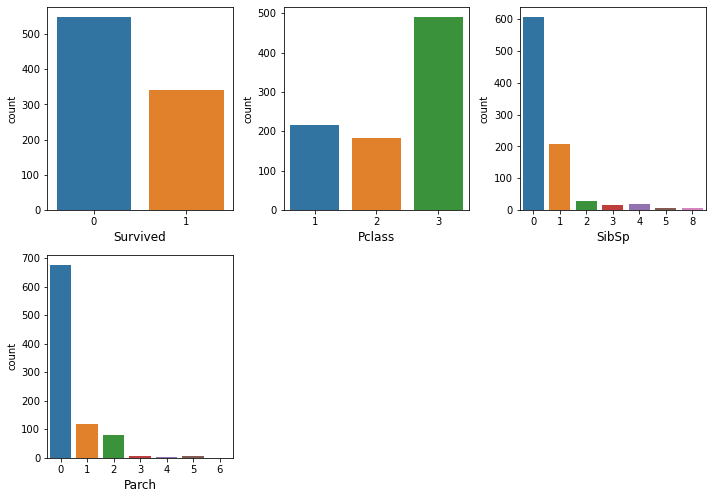

In [270]:
# k stores the value of categorical numerical data and use countplot to see their dstribution
k=df[['Survived','Pclass','SibSp','Parch']]
j=0
plt.figure(figsize=(10,10))
for column in k:
    plt.subplot(3,3,j+1)
    sns.countplot(df[column])
    print(df[column].value_counts())
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()
 

- Survived 
    - only 39% of travelers survived 
    - the data appears to be imbalanced 0.622 ideal about 0.75 ratio of dead to survived
- Pclass 
    - most of travelers opted for Pclass 3 and the least prefered Pclass 2
- SibSp  
    - most of travelers came individually yet there were cases were 8 people from the same family were onboard as well
- Parch
     -  most of travelers came individually, yet their were family were 6 people were parents/children were on board

#### Categorical data


male      577
female    314
Name: Sex, dtype: int64


S    646
C    168
Q     77
Name: Embarked, dtype: int64




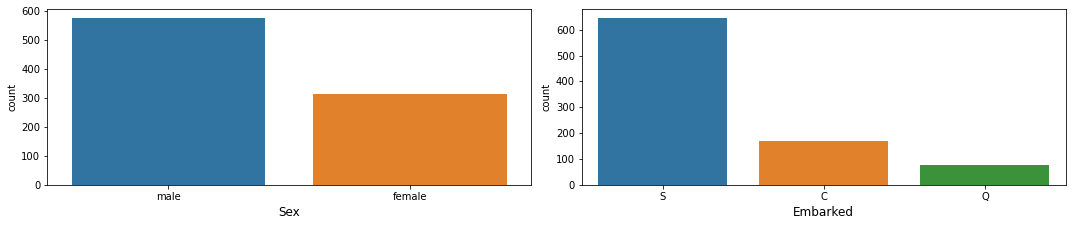

In [271]:
#objectColumns stores all data that are objject datatype
objectColumns=df[['Sex','Embarked']]
j=0
plt.figure(figsize=(15,15))
for column in objectColumns:
    plt.subplot(5,2,j+1)
    sns.countplot(df[column])
    plt.xlabel(column,fontsize=12)
    print(df[column].value_counts())
    print('\n')
    j+=1
plt.tight_layout() 

- Sex: most of the travelers were male
- Embarked: most of travelers prefered S and prefered Q the least

#### Bivariate analysis

<AxesSubplot:xlabel='Sex', ylabel='Age'>

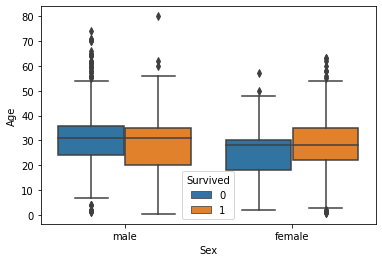

In [272]:
sns.boxplot(x='Sex',y='Age',hue='Survived',data=df)

- the young generation male survived more compared to the older genration
- in female the older generation survived more compared to younger

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

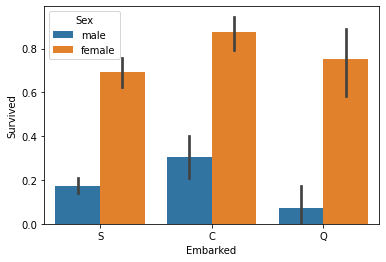

In [273]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=df)

 - the passengers who survived the most were in C section 
 - most of the male in section Q didnt survive
 

#### Deleting columns

- The following factors doesnt help in increasing the survival chance hence dropping those columns
    - ticket is used for passenger to board 
    - name is used to identify a person
    - PassengerID is used to identify a person onboard and has no purpose


In [274]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### check skewness

In [275]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.414480
SibSp       3.695352
Parch       2.749117
Fare        4.811194
dtype: float64

- Age is within the limits and Fare exceed the limits need to be treated 

- rest all are numerical categorical data and skewness is not concerned

In [276]:
#using power transform to transform and normalize the dataset and storing it in A 
from sklearn.preprocessing import power_transform
B=df[['Age','Fare']]
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
A

,Age,Fare
0,-0.562867,-1.235534
1,0.649899,1.378913
2,-0.248760,-1.075612
3,0.430420,1.184347
4,0.430420,-1.048053
...,...,...
886,-0.171543,-0.283773
887,-0.804704,0.709348
888,-0.094804,0.457449
889,-0.248760,0.709348


In [277]:
#storing the changes made back to df
df[A.columns]=A.copy()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.562867,1,0,-1.235534,S
1,1,1,female,0.649899,1,0,1.378913,C
2,1,3,female,-0.248760,0,0,-1.075612,S
3,1,1,female,0.430420,1,0,1.184347,S
4,0,3,male,0.430420,0,0,-1.048053,S
...,...,...,...,...,...,...,...,...
886,0,2,male,-0.171543,0,0,-0.283773,S
887,1,1,female,-0.804704,0,0,0.709348,S
888,0,3,female,-0.094804,1,2,0.457449,S
889,1,1,male,-0.248760,0,0,0.709348,C


In [278]:
#check
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.059667
SibSp       3.695352
Parch       2.749117
Fare        0.220126
dtype: float64

within acceptable limits 0.65 to -0.65

#### Encoding

In [279]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
objectColumns=df[['Sex','Embarked']]
for i in objectColumns.columns:
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,-0.562867,1,0,-1.235534,2.0
1,1,1,0.0,0.649899,1,0,1.378913,0.0
2,1,3,0.0,-0.248760,0,0,-1.075612,2.0
3,1,1,0.0,0.430420,1,0,1.184347,2.0
4,0,3,1.0,0.430420,0,0,-1.048053,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,-0.171543,0,0,-0.283773,2.0
887,1,1,0.0,-0.804704,0,0,0.709348,2.0
888,0,3,0.0,-0.094804,1,2,0.457449,2.0
889,1,1,1.0,-0.248760,0,0,0.709348,0.0


#### checking correlation

In [280]:
df.corr()["Survived"].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.089109
SibSp      -0.035322
Parch       0.081629
Fare        0.313561
Survived    1.000000
Name: Survived, dtype: float64

SibSp has the least correlation 0.03 and the maximum correlation is with Sex -0.54

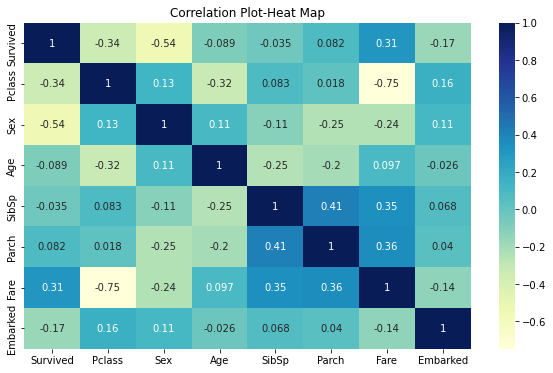

In [281]:
#plotting heatmap to see the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

the highest feature to feature correlation is -0.56 between Pclass and Fare

In [282]:
#checking for multicollinearity by using vif
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop('Survived',axis=1)
d=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,1.667952,Pclass
1,4.030547,Sex
2,1.524533,Age
3,1.262438,SibSp
4,1.724383,Parch
5,1.531834,Fare
6,4.606251,Embarked


the vif values is less than 10 

#### Removing outliers using z score

In [283]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  5.274971941638609  %


#### spliting data

In [284]:
X=df_x.drop(['Survived'],axis=1)
Y=df_x['Survived']

#### SMOTE adding some dummy datas to survivers list to increase the ratio to 0.75

In [285]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from imblearn.over_sampling import SMOTE

In [286]:
# by using smote we are adding data to survied(1) such that the ratio between 1 and 0 becomes 0.75
ove_sm=SMOTE(0.75)
X_s,Y_s=ove_sm.fit_resample(X,Y)
X_s

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.000000,-0.562867,1,0,-1.235534,2.0
1,1,0.000000,0.649899,1,0,1.378913,0.0
2,3,0.000000,-0.248760,0,0,-1.075612,2.0
3,1,0.000000,0.430420,1,0,1.184347,2.0
4,3,1.000000,0.430420,0,0,-1.048053,2.0
...,...,...,...,...,...,...,...
887,1,0.912084,2.159459,0,1,1.443815,0.0
888,1,0.000000,1.080329,0,0,1.138051,0.0
889,1,0.000000,0.146492,0,0,1.666559,2.0
890,2,0.000000,0.823887,0,0,-0.283773,2.0


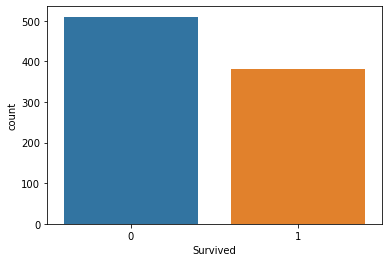

Counter({0: 510, 1: 382})

In [287]:
# plotting to verify the impact of smote on (1) survived
sns.countplot(x=Y_s)
plt.show()
from collections import Counter
Counter(Y_s)

ratio between 1 and 0 is 0.75

#### Running Algorithm

In [288]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [289]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(roc_auc_score(y_test,y_pred))*100
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [290]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(roc_auc_score(y_test,y_te)*100,1)}")
    A.append(round(roc_auc_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(roc_auc_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    print("Confusion matrix \n",confusion_matrix(y_test,y_te))
    print("f1 score is : ",f1_score(y_test,y_te))
    E.append(f1_score(y_test,y_te))
    print('\n')
    print("classification report \n",classification_report(y_test,y_te))
    print("AUC ROC Score: ",roc_auc_score(y_test,y_te))

In [291]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(roc_auc_score(y_train,y_tr)*100,1)
    te_ac=round(roc_auc_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)
    

In [292]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

auc roc score corresponding to  0  is  72.81972490488732
auc roc score corresponding to  1  is  79.2361720807726
auc roc score corresponding to  2  is  76.74129353233832
auc roc score corresponding to  3  is  74.0342405618964
auc roc score corresponding to  4  is  76.48522095405326
auc roc score corresponding to  5  is  78.21188176763243
auc roc score corresponding to  6  is  75.24875621890547
auc roc score corresponding to  7  is  77.44366403277729
auc roc score corresponding to  8  is  82.90166812993853
auc roc score corresponding to  9  is  80.75065847234416
auc roc score corresponding to  10  is  78.4899034240562
auc roc score corresponding to  11  is  74.78050921861283
auc roc score corresponding to  12  is  75.03658179689786
auc roc score corresponding to  13  is  72.7758267486099
auc roc score corresponding to  14  is  77.20954053263097
auc roc score corresponding to  15  is  81.19695639449812
auc roc score corresponding to  16  is  74.99268364062043
auc roc score corresponding 

In [293]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

test accuracy is 77.0
train accuracy is 98.1
Confusion matrix 
 [[81 21]
 [17 50]]
f1 score is :  0.7246376811594204


classification report 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       102
           1       0.70      0.75      0.72        67

    accuracy                           0.78       169
   macro avg       0.77      0.77      0.77       169
weighted avg       0.78      0.78      0.78       169

AUC ROC Score:  0.7701931518876208


At cv is 2 cv score is 76.54  
 test accuracy is 77.0 

At cv is 3 cv score is 76.42  
 test accuracy is 77.0 

At cv is 4 cv score is 77.25  
 test accuracy is 77.0 

At cv is 5 cv score is 77.37  
 test accuracy is 77.0 

At cv is 6 cv score is 76.89  
 test accuracy is 77.0 

At cv is 7 cv score is 78.21  
 test accuracy is 77.0 

At cv is 8 cv score is 78.68  
 test accuracy is 77.0 

At cv is 9 cv score is 78.08  
 test accuracy is 77.0 

At cv is 10 cv score is 77.86  
 test accurac

In [294]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

auc roc score corresponding to  0  is  85.18437225636522
auc roc score corresponding to  1  is  81.43107989464443
auc roc score corresponding to  2  is  76.74129353233832
auc roc score corresponding to  3  is  77.97775826748608
auc roc score corresponding to  4  is  81.19695639449812
auc roc score corresponding to  5  is  81.17500731635937
auc roc score corresponding to  6  is  77.72168568920105
auc roc score corresponding to  7  is  82.15539947322213
auc roc score corresponding to  8  is  82.15539947322213
auc roc score corresponding to  9  is  80.21656423763534
auc roc score corresponding to  10  is  75.24875621890547
auc roc score corresponding to  11  is  77.72168568920105
auc roc score corresponding to  12  is  78.25577992390987
auc roc score corresponding to  13  is  76.71934445419959
auc roc score corresponding to  14  is  77.69973661106233
auc roc score corresponding to  15  is  81.2189054726368
auc roc score corresponding to  16  is  77.23148961076967
auc roc score correspondi

In [295]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

test accuracy is 76.8
train accuracy is 98.0
Confusion matrix 
 [[92 19]
 [17 41]]
f1 score is :  0.6949152542372882


classification report 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       111
           1       0.68      0.71      0.69        58

    accuracy                           0.79       169
   macro avg       0.76      0.77      0.77       169
weighted avg       0.79      0.79      0.79       169

AUC ROC Score:  0.7678626902764834


At cv is 2 cv score is 77.25  
 test accuracy is 76.8 

At cv is 3 cv score is 79.62  
 test accuracy is 76.8 

At cv is 4 cv score is 80.92  
 test accuracy is 76.8 

At cv is 5 cv score is 80.93  
 test accuracy is 76.8 

At cv is 6 cv score is 80.33  
 test accuracy is 76.8 

At cv is 7 cv score is 81.76  
 test accuracy is 76.8 

At cv is 8 cv score is 81.05  
 test accuracy is 76.8 

At cv is 9 cv score is 80.69  
 test accuracy is 76.8 

At cv is 10 cv score is 81.05  
 test accurac

In [296]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

auc roc score corresponding to  0  is  80.00438981562775
auc roc score corresponding to  1  is  75.78285045361429
auc roc score corresponding to  2  is  81.66520339479075
auc roc score corresponding to  3  is  73.26602282704127
auc roc score corresponding to  4  is  80.94088381621305
auc roc score corresponding to  5  is  80.19461515949664
auc roc score corresponding to  6  is  78.21188176763243
auc roc score corresponding to  7  is  78.95815042434884
auc roc score corresponding to  8  is  81.43107989464443
auc roc score corresponding to  9  is  79.19227392449517
auc roc score corresponding to  10  is  80.68481123792802
auc roc score corresponding to  11  is  76.97541703248463
auc roc score corresponding to  12  is  73.3099209833187
auc roc score corresponding to  13  is  77.20954053263097
auc roc score corresponding to  14  is  71.23939127889962
auc roc score corresponding to  15  is  82.45537020778461
auc roc score corresponding to  16  is  74.99268364062043
auc roc score correspondi

In [297]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

test accuracy is 78.4
train accuracy is 83.6
Confusion matrix 
 [[87 14]
 [20 48]]
f1 score is :  0.7384615384615385


classification report 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       101
           1       0.77      0.71      0.74        68

    accuracy                           0.80       169
   macro avg       0.79      0.78      0.79       169
weighted avg       0.80      0.80      0.80       169

AUC ROC Score:  0.783634245777519


At cv is 2 cv score is 78.79  
 test accuracy is 78.4 

At cv is 3 cv score is 78.56  
 test accuracy is 78.4 

At cv is 4 cv score is 79.98  
 test accuracy is 78.4 

At cv is 5 cv score is 79.15  
 test accuracy is 78.4 

At cv is 6 cv score is 79.74  
 test accuracy is 78.4 

At cv is 7 cv score is 79.39  
 test accuracy is 78.4 

At cv is 8 cv score is 80.46  
 test accuracy is 78.4 

At cv is 9 cv score is 80.1  
 test accuracy is 78.4 

At cv is 10 cv score is 79.99  
 test accuracy 

In [298]:
from sklearn.ensemble import GradientBoostingClassifier
grad_c=GradientBoostingClassifier()
R=max_aucroc_score(grad_c,X,Y)

auc roc score corresponding to  0  is  80.9847819724905
auc roc score corresponding to  1  is  82.41147205150718
auc roc score corresponding to  2  is  76.69739537606087
auc roc score corresponding to  3  is  75.46093064091308
auc roc score corresponding to  4  is  82.41147205150718
auc roc score corresponding to  5  is  83.1577407082236
auc roc score corresponding to  6  is  79.19227392449517
auc roc score corresponding to  7  is  79.91659350307287
auc roc score corresponding to  8  is  83.13579163008488
auc roc score corresponding to  9  is  79.70441908106527
auc roc score corresponding to  10  is  79.70441908106527
auc roc score corresponding to  11  is  76.97541703248463
auc roc score corresponding to  12  is  81.43107989464443
auc roc score corresponding to  13  is  78.16798361135498
auc roc score corresponding to  14  is  77.20954053263097
auc roc score corresponding to  15  is  82.94556628621598
auc roc score corresponding to  16  is  76.46327187591456
auc roc score correspondin

In [299]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(grad_c,x4_train,x4_test,y4_train,y4_test)

test accuracy is 80.6
train accuracy is 90.2
Confusion matrix 
 [[93  8]
 [21 47]]
f1 score is :  0.7642276422764227


classification report 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       101
           1       0.85      0.69      0.76        68

    accuracy                           0.83       169
   macro avg       0.84      0.81      0.81       169
weighted avg       0.83      0.83      0.82       169

AUC ROC Score:  0.805984274898078


At cv is 2 cv score is 81.04  
 test accuracy is 80.6 

At cv is 3 cv score is 81.87  
 test accuracy is 80.6 

At cv is 4 cv score is 83.18  
 test accuracy is 80.6 

At cv is 5 cv score is 81.75  
 test accuracy is 80.6 

At cv is 6 cv score is 82.58  
 test accuracy is 80.6 

At cv is 7 cv score is 82.58  
 test accuracy is 80.6 

At cv is 8 cv score is 83.53  
 test accuracy is 80.6 

At cv is 9 cv score is 83.53  
 test accuracy is 80.6 

At cv is 10 cv score is 83.06  
 test accuracy

In [300]:
from sklearn.svm import SVC
svc=SVC()
R=max_aucroc_score(svc,X,Y)

auc roc score corresponding to  0  is  79.2142230026339
auc roc score corresponding to  1  is  79.93854258121158
auc roc score corresponding to  2  is  78.68012876792507
auc roc score corresponding to  3  is  78.44600526777874
auc roc score corresponding to  4  is  80.68481123792802
auc roc score corresponding to  5  is  82.41147205150718
auc roc score corresponding to  6  is  80.91893473807433
auc roc score corresponding to  7  is  80.91893473807433
auc roc score corresponding to  8  is  80.42873865964295
auc roc score corresponding to  9  is  80.19461515949664
auc roc score corresponding to  10  is  79.44834650278021
auc roc score corresponding to  11  is  78.21188176763243
auc roc score corresponding to  12  is  78.98009950248756
auc roc score corresponding to  13  is  76.67544629792215
auc roc score corresponding to  14  is  78.1899326894937
auc roc score corresponding to  15  is  82.94556628621598
auc roc score corresponding to  16  is  77.95580918934738
auc roc score correspondin

In [301]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(svc,x5_train,x5_test,y5_train,y5_test)
print('\n')
score(svc,x5_train,x5_test,y5_train,y5_test)

test accuracy is 80.5
train accuracy is 80.6
Confusion matrix 
 [[90  9]
 [21 49]]
f1 score is :  0.765625


classification report 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        99
           1       0.84      0.70      0.77        70

    accuracy                           0.82       169
   macro avg       0.83      0.80      0.81       169
weighted avg       0.82      0.82      0.82       169

AUC ROC Score:  0.8045454545454546


At cv is 2 cv score is 81.04  
 test accuracy is 80.5 

At cv is 3 cv score is 82.23  
 test accuracy is 80.5 

At cv is 4 cv score is 82.23  
 test accuracy is 80.5 

At cv is 5 cv score is 82.23  
 test accuracy is 80.5 

At cv is 6 cv score is 81.99  
 test accuracy is 80.5 

At cv is 7 cv score is 81.99  
 test accuracy is 80.5 

At cv is 8 cv score is 82.1  
 test accuracy is 80.5 

At cv is 9 cv score is 82.11  
 test accuracy is 80.5 

At cv is 10 cv score is 82.22  
 test accuracy is 80.5 


In [302]:
from sklearn.metrics import roc_curve,auc
area=[]

In [386]:
y_te=reg.predict(x1_test)
fpr1,tpr1,threshold1=roc_curve(y_te,y1_test)
roc_auc1= auc(fpr1, tpr1)
area.append(roc_auc1)
print("Area under the Decision Tree ROC curve : %f" % roc_auc1)

Area under the Decision Tree ROC curve : 0.765378


In [387]:

y_te=rf_c.predict(x2_test)
fpr2,tpr2,threshold2=roc_curve(y_te,y2_test)
roc_auc2= auc(fpr2, tpr2)
area.append(roc_auc2)
print("Area under the RF ROC curve : %f" % roc_auc2)

Area under the RF ROC curve : 0.763685


In [388]:
y_te=kc.predict(x3_test)
fpr3,tpr3,threshold3=roc_curve(y_te,y3_test)
roc_auc3= auc(fpr3, tpr3)
area.append(roc_auc3)
print("Area under the KNN ROC curve : %f" % roc_auc3)

Area under the KNN ROC curve : 0.793639


In [389]:
y_te=grad_c.predict(x4_test)
fpr4,tpr4,threshold4=roc_curve(y_te,y4_test)
roc_auc4= auc(fpr4, tpr4)
area.append(roc_auc4)
print("Area under the GRAD ROC curve : %f" % roc_auc4)

Area under the GRAD ROC curve : 0.835167


In [390]:
y_te=svc.predict(x5_test)
fpr5,tpr5,threshold5=roc_curve(y_te,y5_test)
roc_auc5= auc(fpr5, tpr5)
area.append(roc_auc5)
print("Area under the SVC ROC curve : %f" % roc_auc5)

Area under the SVC ROC curve : 0.827819


#### Creating Table to store datas

In [308]:
aa=['DT','RF','KNN','GRAD','SVC']

In [309]:
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff(least cv_score-test accuracy)':D,'mse':C,'mae':mae,'F1 score':E,'roc_curve_area':area},index=aa)
kk

,test accuracy,max_cv_score,diff(least cv_score-test accuracy),mse,mae,F1 score,roc_curve_area
DT,77.0,78.680368,0.024874,0.224852,0.224852,0.724638,0.765378
RF,76.8,81.756198,0.451185,0.213018,0.213018,0.694915,0.763685
KNN,78.4,80.686607,0.155143,0.201183,0.201183,0.738462,0.793639
GRAD,80.6,83.529874,0.442654,0.171598,0.171598,0.764228,0.835167
SVC,80.5,82.230492,0.542654,0.177515,0.177515,0.765625,0.827819


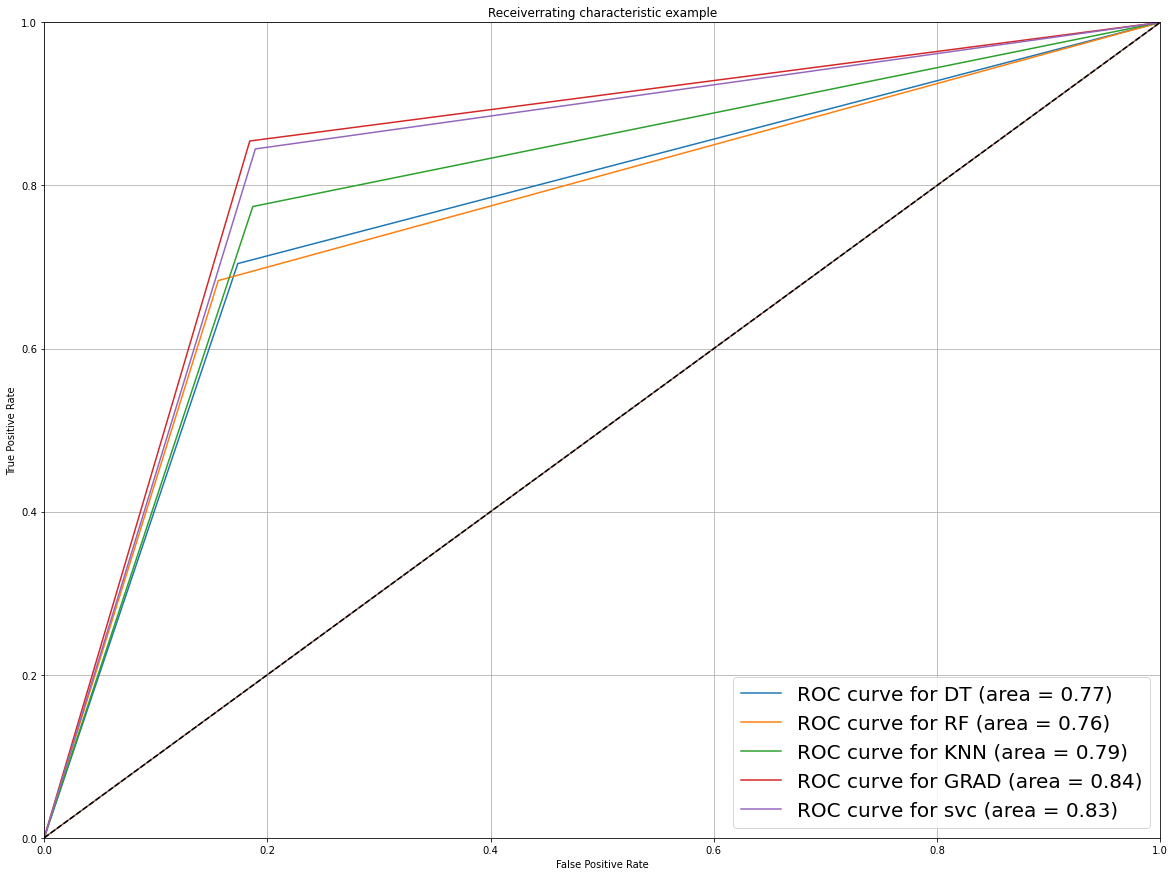

In [310]:
plt.figure(figsize = (20,15))

plt.plot(fpr1, tpr1, label = 'ROC curve for DT (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ROC curve for RF (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ROC curve for KNN (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'ROC curve for GRAD (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'ROC curve for svc (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], [0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)
plt.show()

#### Infernce

- GradientBoostingClassifier is the best model
    - Highest test accuracy
    - Higest cv_score
    - 3rd highest differnce in difference between cv_Score and test accuracy
    - least error in mae and mse
    - second highest F1 score
    - highest area under Roc_auc curve
       

#### Hyper paramter tuning

In [311]:
from sklearn.model_selection import GridSearchCV

In [350]:
par={'loss':[ 'log_loss', 'deviance', 'exponential'],
     'learning_rate':[0.08,0.09,0.095,0.1,0.2,0.3,0.5,0.6,0.8,1,10],
     'criterion':['friedman_mse','mse'],
     'n_estimators':[10,50,70,80,90,100,150,200,250,300,350,400],
     'max_features' : ['auto', 'sqrt', 'log2']
}

In [351]:
grid=GridSearchCV(grad_c,par,cv=3)
grid.fit(x4_train,y4_train)
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'exponential',
 'max_features': 'log2',
 'n_estimators': 90}

In [377]:
grad=GradientBoostingClassifier( criterion= 'friedman_mse', learning_rate= 0.2, loss= 'exponential', max_features= 'log2', n_estimators= 90)
grad.fit(x4_train,y4_train)
y_te=grad.predict(x4_test)
r2=round(roc_auc_score(y4_test,y_te)*100,1)
print(r2)

82.6


In [378]:
cv_score=cross_val_score(grad,X,Y,cv=3)
cv_mean=cv_score.mean()*100
print(cv_mean)

82.46594819245686


In [379]:
 print("Confusion matrix \n",confusion_matrix(y4_test,y_te))

Confusion matrix 
 [[94  7]
 [19 49]]


In [383]:
print("classification report \n",classification_report(y4_test,y_te))
print("AUC ROC Score: ",round(roc_auc_score(y4_test,y_te),2))

classification report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       101
           1       0.88      0.72      0.79        68

    accuracy                           0.85       169
   macro avg       0.85      0.83      0.83       169
weighted avg       0.85      0.85      0.84       169

AUC ROC Score:  0.83


- After tuning the accuracy increaed from 80.6 to 82.6
- the difference between the test accuracy and cv_score is aprox 0.1
- the FN rate has decreased, FN means person is alive but predicted dead 
- The accuracy has increased

#### Storing model and loading it

In [391]:
import pickle
filename='titanic.pkl'
pickle.dump(grad,open(filename,'wb'))

In [392]:
l_m=pickle.load(open('titanic.pkl','rb'))
re=l_m.score(x4_test,y4_test)
print(re*100)

84.61538461538461
